# Soft Means

## Complete Function

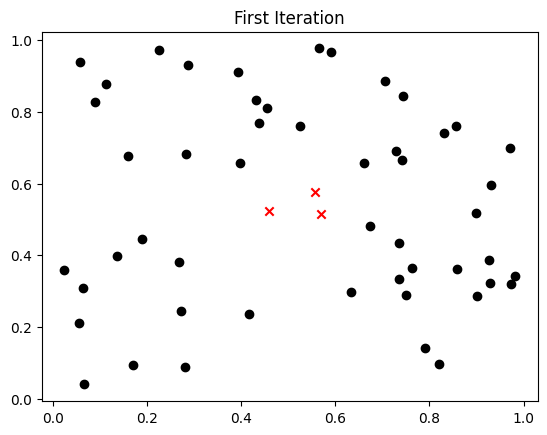

Is the final in the iteration # 26 



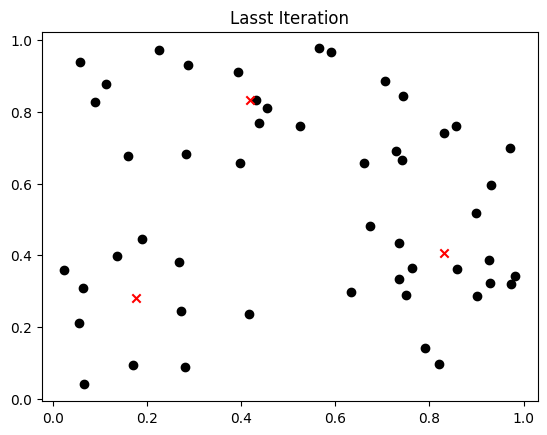

Jm_values:  [8.510882145130486, 6.547437780760052, 6.433557412277919, 6.1598621774633715, 6.090647648016123, 6.277319878625022, 6.374009498851622, 6.404970007069046, 6.421434319659248, 6.43392433677995, 6.450625889084567, 6.471277064224854, 6.4893020016152185, 6.504875131889611, 6.521146847827569, 6.533231341248238, 6.541716687992423, 6.547624941665412, 6.551724714999258, 6.5545644120820965, 6.556529234073383, 6.557887831084423, 6.55882685712256, 6.559475711444679, 6.559923980864899, 6.560233636541106, 6.560447523289488] 



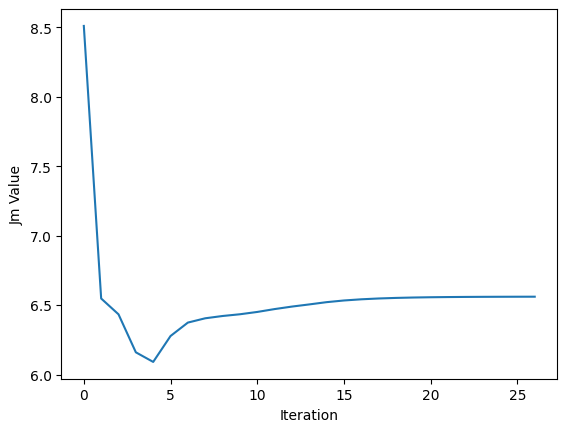

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

#variables
random_seed = random.randint(0, 1000)  # Random seed
e = 1e-4  # Tolerance
max_iter = 300
k = 3  # Number of Centroids
m = 2
n = 50  # Number of samples
d = 2  # Number of dimentions
Jm_values = [] #Jm Values

for r in range(max_iter):

    # Initial Conditions
    if r == 0:
        
        np.random.seed(random_seed)
        X = np.random.rand(n, d)
        W_init = np.random.random((n, k))  # Initial membership indicators with random values
        W_init /= W_init.sum(axis=1, keepdims=True)  # normalize each column so they sum up to 1 
        W_new = np.zeros((n, k))   # Updated membership indicators
        W = np.zeros((n, k))       # membership indicators for calculation

    # Computing the centroids 
    u = np.zeros((k, d))  # Coordinates of the clusters
    sum = np.zeros((k,1)) # Denominator of the formula (Sum)

    if r == 0:
        W = W_init
    else:
        W = W_new.copy()

    for j in range(k):
        for ind in range(d):
            for i in range(n):
                u[j][ind] += (W[i, j] ** m) * X[i][ind]  # Calculating the numerator
                #u[c][1] += (W[i, c] ** m) * X[i][1]
                if ind == 0:
                    sum[j] += W[i, j]**2  # Calculating the denominator 
            
            u[j][ind] = u[j][ind] / sum[j]  # Calculating the ratio
            #u[c][j] = u[c][1] / sum[c]

    # Computing the SCM
    Jm = 0

    for i in range(n):
        
        for j in range(k):
            #Jm += (pow(W[i][j], m) * np.linalg.norm(X[i] - u[j]))
            Jm += (pow(W[i][j], m) * np.linalg.norm(X[i] - u[j]))
    

    Jm_values.append(Jm)

    # Graphic 2nd Iteration
    if r == 1:
        # Plot the X points
        plt.scatter(X[:,0], X[:,1], color='black', marker='o')

        # Plot the cluster centroids
        for c in range(k):
            plt.scatter(u[c][0], u[c][1], color='red', marker='x')
       
        plt.title("First Iteration")
        plt.show()

    # Updating the membership coefficients
    for j in range(k):
        new_column = np.zeros((n, 1))

        for i in range(n):    
            for c in range(k):
                numerator = np.linalg.norm(X[i] - u[j])  # Calculating the numerator
                denominator = np.linalg.norm(X[i] - u[c])  # Calculating the denominator 
                new_column[i] += pow(numerator/denominator, (2/(m-1))) # Calculating the cuadratic ratio
       
        W_new[:, j] = 1 / new_column.reshape(n,)

    
    W_diff = np.abs(W_new - W)

    # Final Condition because of the tolerance
    if np.all(W_diff < e):
        print("Is the final in the iteration #", r, "\n")
        break
    else:
        if r == 299:
            print("Is the final because the iterations !!!!!")

#print("W_diff: ", W_diff) 

# Plot the X points
plt.scatter(X[:,0], X[:,1], color='black', marker='o')

# Plot the cluster centroids
for c in range(k):
    plt.scatter(u[c][0], u[c][1], color='red', marker='x')
plt.title("Lasst Iteration")
plt.show()

print("Jm_values: ", Jm_values, "\n")

# Plotting the Jm Values
plt.plot(Jm_values)
plt.xlabel('Iteration')
plt.ylabel('Jm Value')
plt.show()

## Plotting the points belonging to each cluster

num_cluster: 3


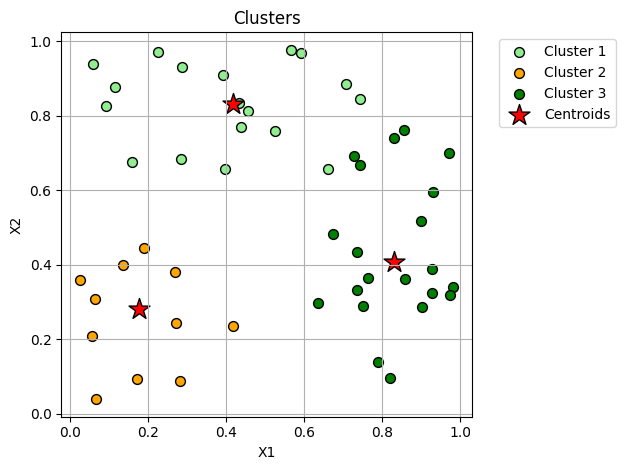

In [3]:
# assigning the labels depending of the max values of W_new matrix 
y = []

for i in W_new:
    max_index = np.argmax(i)
    y.append(max_index)

# define the list of colors and markers for each cluster
colors = ['lightgreen', 'orange', 'green', 'pink', 'yellow', 'purple', 'brown', 'grey', 'red', 'lightblue']

# get the number of clusters
num_clusters = len(set(y))  # number of uniques elements
print("num_cluster:", num_clusters)

# plot each cluster
for i in np.unique(y):
    plt.scatter(x=X[y == i, 0],
                y=X[y == i, 1],
                s=50,
                c=colors[i % len(colors)],  # use modulus to loop over colors
                edgecolor='black',
                label=f'Cluster {i+1}')

# plot the centroids
plt.scatter(u[:, 0],
            u[:, 1],
            s=250,
            marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # the bbox_to_anchor parameter place the legend 
                                                        # outside the upper right corner of the plot
plt.grid()
plt.tight_layout()
plt.show()


## Quantifying the quality of clustering via silhouette plots

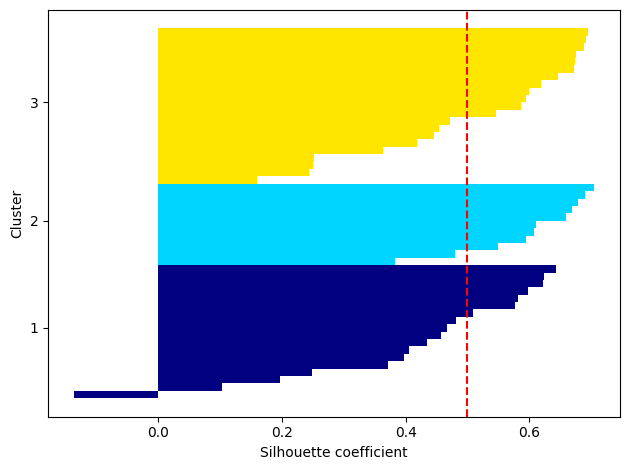

In [4]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

## Elbow method

Is the final in the iteration # 0 

(50, 1)
distances:  [[0.17769466]
 [0.31114845]
 [0.2477812 ]
 [0.17775498]
 [0.37338473]
 [0.44015245]
 [0.45299773]
 [0.36180194]
 [0.28406762]
 [0.39649252]
 [0.57104153]
 [0.25066092]
 [0.57684681]
 [0.61891434]
 [0.369132  ]
 [0.33230955]
 [0.52550993]
 [0.41791829]
 [0.26184048]
 [0.22117441]
 [0.32365848]
 [0.39536464]
 [0.42399532]
 [0.5364136 ]
 [0.2308085 ]
 [0.3535937 ]
 [0.49311058]
 [0.52970745]
 [0.51428605]
 [0.6815973 ]
 [0.53640716]
 [0.51998473]
 [0.390974  ]
 [0.28606779]
 [0.29076674]
 [0.43341872]
 [0.38901095]
 [0.52831998]
 [0.29123061]
 [0.44807232]
 [0.40494711]
 [0.46099371]
 [0.30584588]
 [0.15370489]
 [0.49381705]
 [0.4755087 ]
 [0.39451227]
 [0.24906343]
 [0.46955788]
 [0.37252537]]
labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
# de clusters:  1  -- Inertia: 8.53
Is the final in the iteration # 38 

(50, 2)
distances:  [[0.43479187 0.12352496]
 [0.52012989 

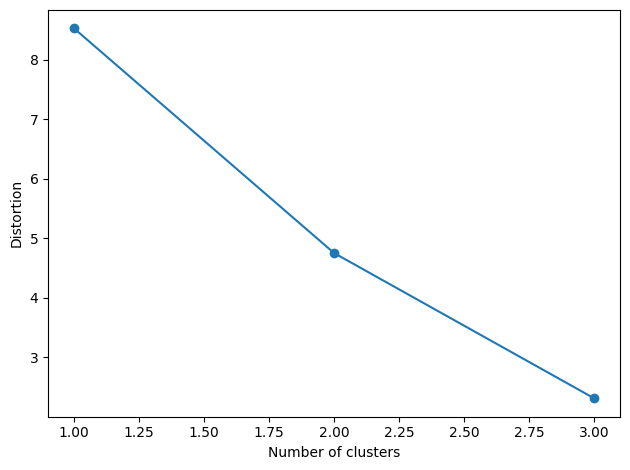

In [13]:
distortions = []

for i in range(1, 11):

    k = i

    for r in range(max_iter):

        # Initial Conditions
        if r == 0:
            
            np.random.seed(random_seed)
            X = np.random.rand(n, d)
            W_init = np.random.random((n, k))  # Initial membership indicators with random values
            W_init /= W_init.sum(axis=1, keepdims=True)  # normalize each column so they sum up to 1 
            W_new = np.zeros((n, k))   # Updated membership indicators
            W = np.zeros((n, k))       # membership indicators for calculation

        # Computing the centroids 
        u = np.zeros((k, d))  # Coordinates of the clusters
        sum = np.zeros((k,1)) # Denominator of the formula (Sum)

        if r == 0:
            W = W_init
        else:
            W = W_new.copy()

        for j in range(k):
            for ind in range(d):
                for i in range(n):
                    u[j][ind] += (W[i, j] ** m) * X[i][ind]  # Calculating the numerator
                    if ind == 0:
                        sum[j] += W[i, j]**2  # Calculating the denominator 
                
                u[j][ind] = u[j][ind] / sum[j]  # Calculating the ratio

        # Computing the SCM
        Jm = 0

        for i in range(n):
            
            for j in range(k):
                Jm += (pow(W[i][j], m) * np.linalg.norm(X[i] - u[j]))
        

        Jm_values.append(Jm)

        # Updating the membership coefficients
        for j in range(k):
            new_column = np.zeros((n, 1))

            for i in range(n):    
                for c in range(k):
                    numerator = np.linalg.norm(X[i] - u[j])  # Calculating the numerator
                    denominator = np.linalg.norm(X[i] - u[c])  # Calculating the denominator 
                    new_column[i] += pow(numerator/denominator, (2/(m-1))) # Calculating the cuadratic ratio
        
            W_new[:, j] = 1 / new_column.reshape(n,)

        
        W_diff = np.abs(W_new - W)

        # Final Condition because of the tolerance
        if np.all(W_diff < e):
            print("Is the final in the iteration #", r, "\n")
            break
        else:
            if r == 299:
                print("Is the final because the iterations !!!!!")

    # !!! Computing the Inertia !!!
    
    # Compute the distances from each sample to each cluster center
    distances = np.zeros((n, k))
    for j in range(k):
        distances[:, j] = np.linalg.norm(X - u[j], axis=1)  # Compute the distance of every row with every cluster.

    # Find the index of the closest cluster center for each sample
    labels = np.argmin(distances, axis=1)

    # Compute the squared distances of each sample to its closest cluster center
    squared_distances = np.zeros((n,))
    for i in range(n):
        squared_distances[i] = np.linalg.norm(X[i] - u[labels[i]])**2

    # Compute the sum of squared distances to get the inertia
    inertia = squared_distances.sum()
    print("# de clusters: ", k, " -- Inertia: %.2f" % inertia)
    distortions.append(inertia)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()